In [1]:
#Code to read in SCAM output from MPACE and make simple plots of output, including all COSP2 variables
#Jennifer Kay (Jennifer.E.Kay@colorado.edu University of Colorado)
#Last updated: July 15, 2021

# Load Packages
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

### Define and open the case to plot
Check the `pth` variable below for the path to the cases

In [2]:
pth='/home/scam/work/cases/'
file0=pth+'cosp.FSCAM.mpace/run/cosp.FSCAM.mpace.cam.h0.2004-10-05-07171.nc'
runtx0=''
iop0='mpace'

# Open Data Set
ds0 = xr.open_mfdataset(file0)

In [8]:
# uncomment below and run cell to print all coordinates and variables
ds0

<xarray.Dataset>
Dimensions:              (cosp_dbze: 15, cosp_ht: 40, cosp_htmisr: 16, cosp_prs: 7, cosp_reffice: 6, cosp_reffliq: 6, cosp_scol: 10, cosp_sr: 15, cosp_sza: 5, cosp_tau: 7, cosp_tau_modis: 7, ilev: 33, lat: 1, lev: 32, lon: 1, nbnd: 2, time: 1243)
Coordinates:
  * lat                  (lat) float64 70.5
  * lon                  (lon) float64 206.0
  * lev                  (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev                 (ilev) float64 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * cosp_prs             (cosp_prs) float64 9e+04 7.4e+04 ... 2.45e+04 9e+03
  * cosp_tau             (cosp_tau) float64 0.15 0.8 2.45 6.5 16.2 41.5 100.0
  * cosp_scol            (cosp_scol) int32 1 2 3 4 5 6 7 8 9 10
  * cosp_ht              (cosp_ht) float64 1.896e+04 1.848e+04 ... 720.0 240.0
  * cosp_sr              (cosp_sr) float64 -0.495 0.605 2.1 ... 55.0 70.0 539.5
  * cosp_sza             (cosp_sza) float64 0.0 20.0 40.0 60.0 80.0
  * cosp_dbze            (cos

### Plot/Print Single Level non-COSP Field

[[0.9826289]]


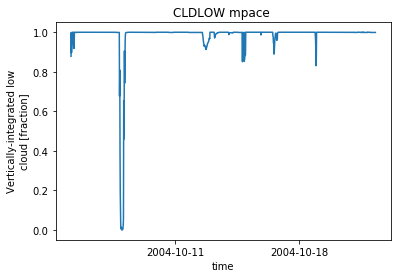

In [4]:
#varn='TS'
#varn='PRECL'
varn='CLDLOW'

ds0[varn].plot()
plt.title(varn+' '+iop0+' '+runtx0);

## print the time mean
v0mean=ds0[varn].mean(dim='time');
print(v0mean.values)

### Plot/Print Single Level COSP Field

[[[100.]]

 [[ nan]]

 [[ nan]]

 [[100.]]

 [[ nan]]

 [[ nan]]

 [[100.]]]
[[86.87657]]
86.87657
(412,)
(412,)


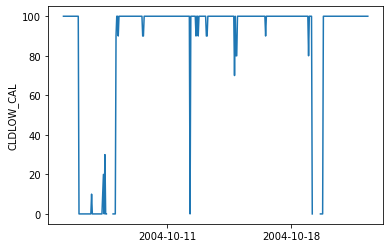

In [5]:
# recall that: 1) COSP only runs on the radiation timestep, 2) COSP does not run for the first 6 timesteps of CAM
varn_cosp='CLDLOW_CAL'
print(ds0[varn_cosp][7:14].values)

## calculate (xarray) and print the time mean
v0mean_cosp=ds0[varn_cosp][7::].mean(dim='time');
print(v0mean_cosp.values)

## calculate (numpy) and print the time mean
print(np.nanmean(ds0[varn_cosp][7::].values))

## only plot the values for COSP

foo=ds0[varn_cosp][7::3,0,0]
cosp_time=ds0['time'][7::3]
print(cosp_time.shape)
print(foo.shape)
plt.plot(cosp_time,foo)
plt.ylabel(varn_cosp);

### another option is to create a mask so that you only plot values where they exist
#mask=np.isfinite(foo)
#print(foo[mask].shape)
#plt.plot(foo[mask]);

### Plot a multi level field
**Warning**: Some fields have vertical coordinate 'ilev', may need to change to `y='ilev'` below

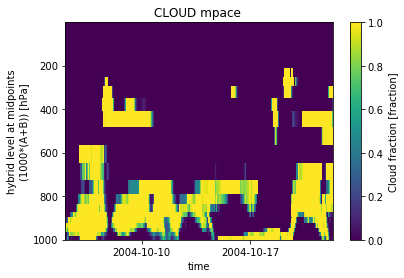

In [6]:
varm='CLOUD'
#varm='bc_a4'
#varm='CCN3'
ds0[varm].plot(y='lev',yincrease=False)
plt.title(varm+' '+iop0+' '+runtx0);

### Plot a vertical time average
For a multi level field.
**Remember**: use the correct vertical dimension (`y='lev'` or `y='ilev'`)

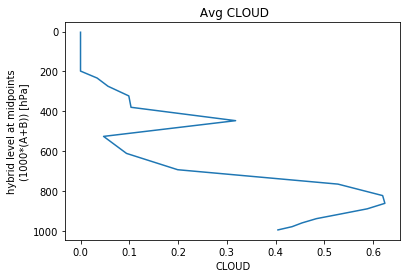

In [7]:
#Make vertical average and plot  y='lev' swaps axes, label sets up legend
v0=ds0[varm].mean(dim='time').plot(y='lev',yincrease=False)
#Add title
plt.title(runtx0+' Avg '+varm);

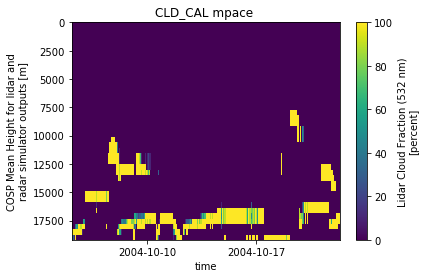

In [17]:
varm_cosp='CLD_CAL'
ds0[varm_cosp][7::3,:,0,0].plot(y='cosp_ht',yincrease=False);
plt.title(varm_cosp+' '+iop0+' '+runtx0);

#Make vertical average and plot  y='lev' swaps axes, label sets up legend
ds0[varm_cosp][7::3,:,0,0].mean(dim='time').plot(y='cosp_ht',yincrease=False)
#Add title
plt.title(varm_cosp+' '+iop0+' '+runtx0);

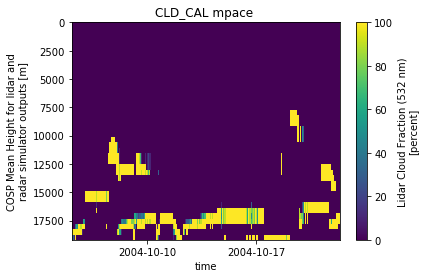

In [21]:
varm_cosp='CLD_CAL'
ds0[varm_cosp][7::3,:,0,0].plot(y='cosp_ht',yincrease=False);
plt.title(varm_cosp+' '+iop0+' '+runtx0);

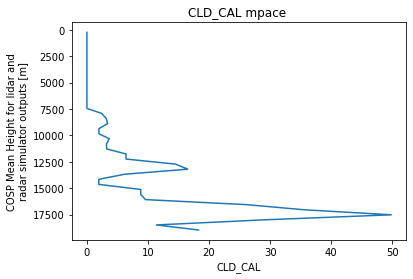

In [22]:
#Make vertical average and plot  y='lev' swaps axes, label sets up legend
ds0[varm_cosp][7::3,:,0,0].mean(dim='time').plot(y='cosp_ht',yincrease=False)
#Add title
plt.title(varm_cosp+' '+iop0+' '+runtx0);

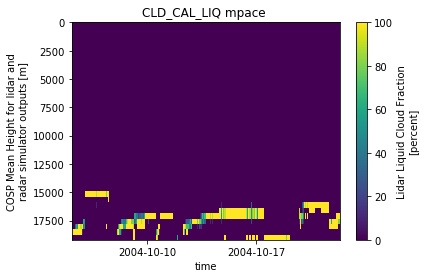

In [24]:
varm_cosp='CLD_CAL_LIQ'
ds0[varm_cosp][7::3,:,0,0].plot(y='cosp_ht',yincrease=False);
plt.title(varm_cosp+' '+iop0+' '+runtx0);

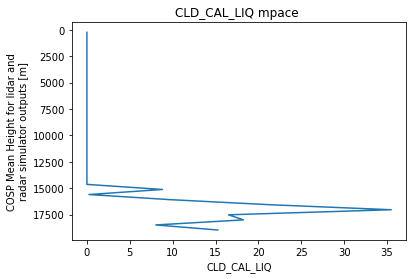

In [25]:
#Make vertical average and plot  y='lev' swaps axes, label sets up legend
ds0[varm_cosp][7::3,:,0,0].mean(dim='time').plot(y='cosp_ht',yincrease=False)
#Add title
plt.title(varm_cosp+' '+iop0+' '+runtx0);